## More detailed heatmap

Date created: 2023-07-14

Purpose: We need to select a model threshold in order to simulate the rollout of the model on 2017 using real demand/predictions. 

This is a more detailed search of the combinations of sensitivity/specificity that look reasonable based on the mean AUC from 10-fold CV.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/home/joefarrington/CDT/plt_returns/plt_returns/simulation/outputs/uclh_demand_aoa_ss_focus_on_sens_spec_range/2023-07-13/18-25-53/performance_by_sens_spec.csv")

In [13]:
df["1-specificity"] = (1 - df["specificity"]).round(2)

<Axes: xlabel='1-specificity', ylabel='sensitivity'>

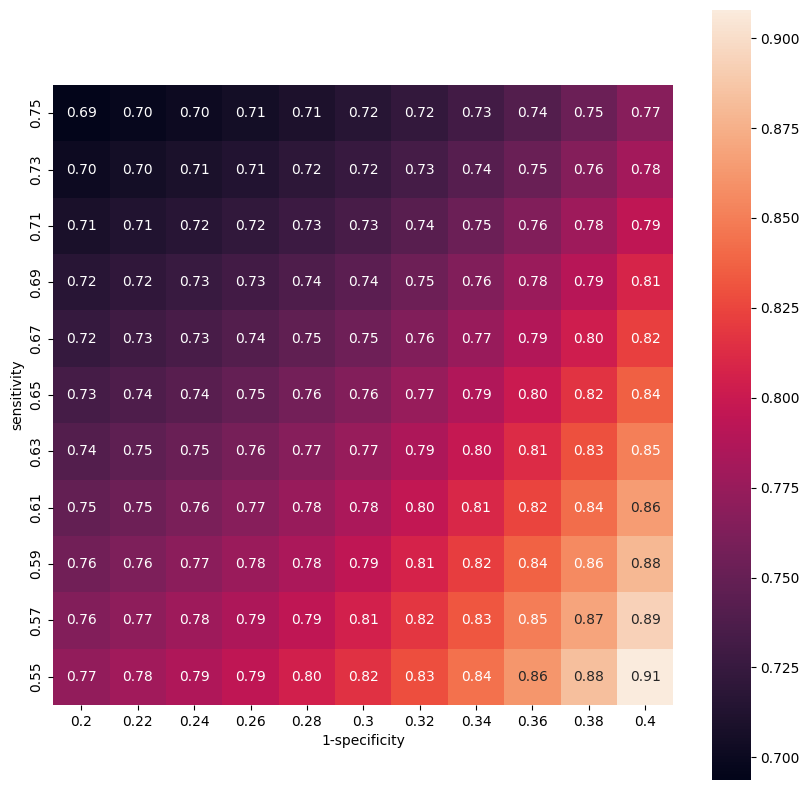

In [14]:
y_col = "sensitivity"
x_col = "1-specificity"
val_col = "total_wastage_%_mean"

to_plot = df.pivot(index=y_col, columns=x_col, values=val_col)
to_plot = to_plot.sort_index(ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    to_plot,
    annot=True,
    #xticklabels=np.arange(0, 1.1, 0.1).round(1),
    square=True,
    fmt=".2f",
)